In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import time

In C:\Users\joel9\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\joel9\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\joel9\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\joel9\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\joel9\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
import sys
sys.path.append("../code")
import model_agegroups
import plotting
import plotting_agegroups
import parameters_agegroups

In [3]:
params_m1 = parameters_agegroups.get_params(country='Germany', modeltype='ramp', scenario='scenario3') #Freedom day
params_m2 = parameters_agegroups.get_params(country='Germany', modeltype='ramp', scenario='scenario2') #Leave work opem
params_m3 = parameters_agegroups.get_params(country='Germany', modeltype='ramp', scenario='scenario1') #Close everything
params_mFW = parameters_agegroups.get_params(country='Germany', modeltype='ramp', scenario='scenario3') #Freedom day
params_mFW.update( {'alpha_w': 0.0, 'alpha_u': 0.0, 'alpha_R': 0.0,} )

# Will put all of these to a parameter file soon

params_mFW['feedback_off'] = True

In [4]:
m1 = model_agegroups.Model(**params_m1)
m2 = model_agegroups.Model(**params_m2)
m3 = model_agegroups.Model(**params_m3)
mFW = model_agegroups.Model(**params_mFW)

In [5]:
start_time = time.time()
times, data = m1.run()
print(time.time() - start_time)
times, data = m2.run()
print(time.time() - start_time)
times, data = m3.run()
print(time.time() - start_time)
times, data = mFW.run()
print(time.time() - start_time)

23.507549285888672
48.31784963607788
76.48159885406494
104.9473807811737


In [6]:
[(m.chopped_data() < 0 ).any() for m in [m1,m2,m3,mFW]]

[False, False, False, False]

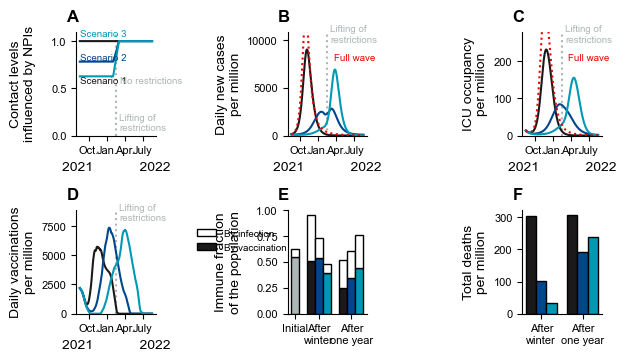

In [7]:
import importlib
importlib.reload(plotting_agegroups)
plotting_agegroups.sixpanels([m1,m2,m3], "./figures/extended_fig2.pdf", arial=True, full_wave=mFW)

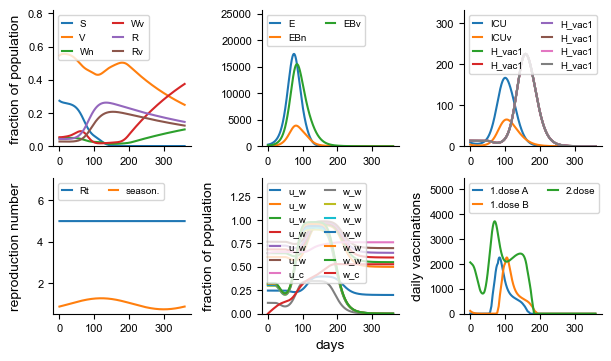

In [8]:
importlib.reload(plotting_agegroups)
plotting_agegroups.overview(m1, arial=True)

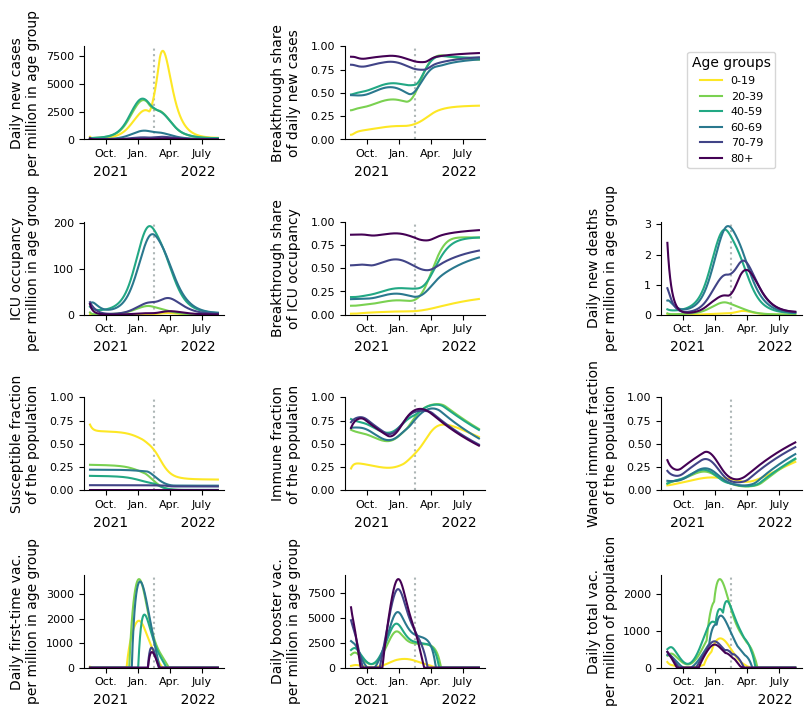

In [9]:
importlib.reload(plotting_agegroups)
plotting_agegroups.overview_agegroups(m2, path='./figures/show.pdf')